In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## get the data first

The Old Faithful data set contains the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA (Fig. A.7). The two variables are:

The variable eruptions contains the eruption time (in minutes). Unusually, the histogram is bimodal.
The variable waiting is the waiting time (in minutes) until the next eruption. Unusually, the histogram is bimodal.

In [3]:
# the dataset is tab separated
df = pd.read_csv('https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv', sep='\t')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
#size of dataset df
df.shape

(272, 2)

In [5]:
(df.mean(),df.std())

(eruptions     3.487783
 waiting      70.897059
 dtype: float64,
 eruptions     1.141371
 waiting      13.594974
 dtype: float64)

## standardizing, such that each of the variables has zero mean and unit standard deviation.

In [6]:
#standaraize the data df
df_stand = (df - df.mean()) / df.std()
df_stand.head()

,eruptions,waiting
0,0.098318,0.596025
1,-1.478733,-1.242890
2,-0.135612,0.228242
3,-1.055558,-0.654437
4,0.915755,1.037364


In [7]:
(df_stand.mean(),df_stand.std())


(eruptions    4.800082e-16
 waiting      4.261297e-16
 dtype: float64,
 eruptions    1.0
 waiting      1.0
 dtype: float64)

## scatter plot

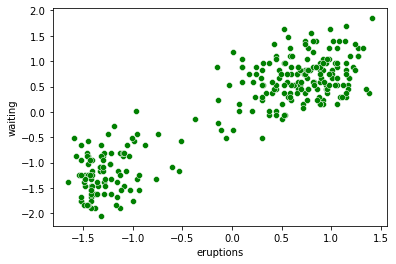

In [8]:
#scatter plot with green colour for df_stand where x is the first column and y is the second column
sns.scatterplot(x=df_stand.iloc[:,0], y=df_stand.iloc[:,1], color='green')
plt.grid(False)

## code for graph

In [13]:
#scatter plot for distinguishing between different clusters

def cluster_plot(centroids,indicator,df):
    # seperate the df_stand_array into two clusters based on the indicator matrix
    df_cluster1 = df[np.where(indicator[:,0]== 1)]
    df_cluster2 = df[np.where(indicator[:,1]== 1)]
     #plot a line perpendicular to the line joining the centroids
    #find the middle point of centroids
    x_mid = (centroids[:,0].max() + centroids[:,0].min()) / 2
    y_mid = (centroids[:,1].max() + centroids[:,1].min()) / 2
    #find the slope of the line perpendicular to line joining the centroids
    slope = -(1/((centroids[:,1].max() - centroids[:,1].min()) / (centroids[:,0].max() - centroids[:,0].min())))
    plt.axline((x_mid, y_mid), slope=slope, linewidth=2, color='purple')
    plt.scatter(df_cluster1[:,0], df_cluster1[:,1], color='red')
    plt.scatter(df_cluster2[:,0], df_cluster2[:,1], color='blue')
    #plot the centroids with corresponding colour and of shape cross
    plt.scatter(centroids[0,0],centroids[0,1] ,color='red', marker='x', s=200)
    plt.scatter(centroids[1,0],centroids[1,1], color='blue', marker='x', s=200)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.grid(False)
    plt.show()

## Doing em steps

In [11]:
# implement the k-means algorithm
def kmeans(k, df_stand_array, centroids):
    #initialize the indicator matrix
    indicator = np.zeros((df_stand_array.shape[0], k))
    cluster_plot(centroids, indicator, df_stand_array)
    #initialize the centroids
    #initialize the previous centroids
    prev_centroids = np.zeros((k, df_stand_array.shape[1]))
    #initialize the number of iterations
    iterations = 0
    # E step
    #initialize the distance between the previous and current centroids
    distance = np.linalg.norm(centroids - prev_centroids)
    #while the distance between the previous and current centroids is greater than 0.001
    while distance > 0.001:
        #for each point in the dataset
        for i in range(df_stand_array.shape[0]):
            #calculate the distance between the point and each centroid and store them in a numpy array
            j = np.argmin(np.linalg.norm(df_stand_array[i] - centroids, axis=1))
            indicator[i, j] = 1
            if j==1:
                indicator[i,0]=0
            else:
                indicator[i,1]=0
        #for each cluster
        cluster_plot(centroids, indicator, df_stand_array)
        # M step
        for i in range(k):
            #calculate the mean of each cluster
            centroids[i] = np.mean(df_stand_array[np.where(indicator[:, i] == 1)], axis=0)
        cluster_plot(centroids, indicator, df_stand_array)
        #increment the number of iterations
        iterations += 1
        #calculate the distance between the previous and current centroids
        distance = np.linalg.norm(centroids - prev_centroids)
        #set the previous centroids to the current centroids
        prev_centroids = centroids
    return centroids, indicator, iterations

## initialize the variables before calling the function

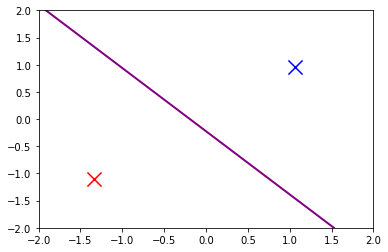

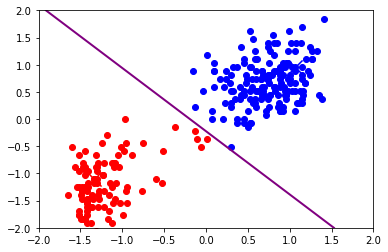

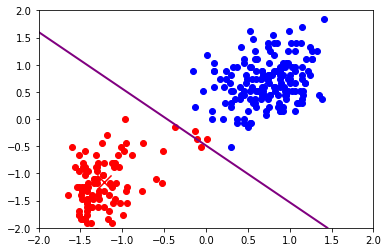

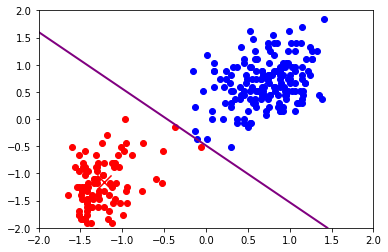

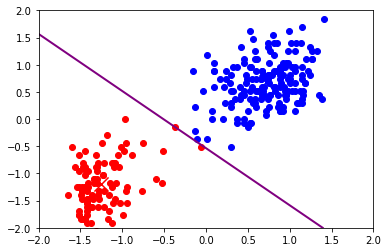

In [14]:
#convert the dataframe to a numpy array
df_stand_array = df_stand.to_numpy()
#initialize the number of clusters
k = 2
#initialize the centroids
centroids = df_stand_array[np.random.choice(df_stand_array.shape[0], k, replace=False)]
#call the function
centroids, indicator, iterations = kmeans(k, df_stand_array, centroids)


